<a href="https://colab.research.google.com/github/AngelBrand1/un/blob/main/Tarea_DT_GNB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

df = pd.read_csv('/content/Taller5_2_Modificada.csv')

df.head()

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,...,ADDR_PCT_CD,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,PARKS_NM,HADEVELOPT,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon
0,736216184,09/30/2016,23:25:00,09/30/2016,23:25:00,09/30/2016,236,DANGEROUS WEAPONS,782.0,"WEAPONS, POSSESSION, ETC",...,42,NaN,TRANSIT - NYC SUBWAY,NaN,NaN,1015308.0,244373.0,40.837376,-73.887761,"(40.837376359, -73.887760929)"
1,294332956,09/30/2016,23:16:00,09/30/2016,23:21:00,09/30/2016,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,...,71,OPPOSITE OF,STREET,NaN,NaN,997932.0,180172.0,40.661205,-73.950687,"(40.661204871, -73.950686652)"
2,852981427,09/30/2016,23:00:00,09/30/2016,23:05:00,09/30/2016,235,DANGEROUS DRUGS,567.0,"MARIJUANA, POSSESSION 4 & 5",...,43,INSIDE,RESIDENCE - PUBLIC HOUSING,NaN,CASTLE HILL,1025580.0,236918.0,40.816872,-73.850685,"(40.816872438, -73.850684927)"
3,369976063,09/30/2016,23:00:00,NaN,NaN,09/30/2016,118,DANGEROUS WEAPONS,793.0,WEAPONS POSSESSION 3,...,103,NaN,STREET,NaN,NaN,1038464.0,192970.0,40.696177,-73.804492,"(40.696177006, -73.804492266)"
4,117213771,09/30/2016,23:00:00,09/30/2016,23:10:00,09/30/2016,578,HARRASSMENT 2,637.0,"HARASSMENT,SUBD 1,CIVILIAN",...,110,FRONT OF,STREET,NaN,NaN,1016301.0,209428.0,40.741458,-73.884339,"(40.741458245, -73.884339073)"


In [5]:
# Cargar los datos (Asegúrate de cambiar 'archivo.csv' por el nombre real)
df = pd.read_csv('/content/Taller5_2_Modificada.csv')

# Selección de columnas relevantes
df = df[['KY_CD', 'BORO_NM', 'LAW_CAT_CD', 'CMPLNT_FR_TM']]  # Variables elegidas
df.head()

,KY_CD,BORO_NM,LAW_CAT_CD,CMPLNT_FR_TM
0,236,BRONX,MISDEMEANOR,23:25:00
1,344,BROOKLYN,MISDEMEANOR,23:16:00
2,235,BRONX,MISDEMEANOR,23:00:00
3,118,QUEENS,FELONY,23:00:00
4,578,QUEENS,VIOLATION,23:00:00


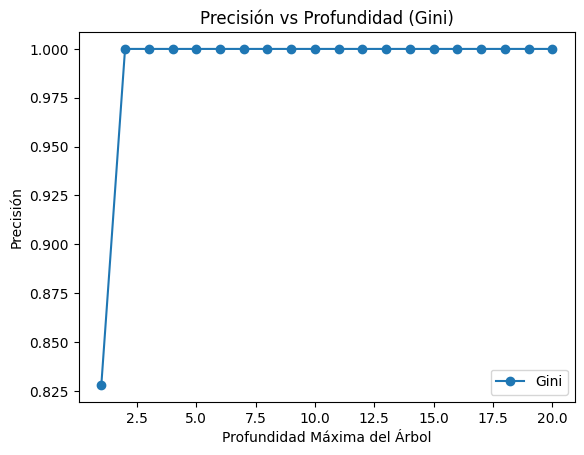

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Cargar los datos (Asegúrate de cambiar 'archivo.csv' por el nombre real)
df = pd.read_csv('/content/Taller5_2_Modificada.csv')

# Selección de columnas relevantes
df = df[['KY_CD', 'BORO_NM', 'LAW_CAT_CD', 'CMPLNT_FR_TM']]  # Variables elegidas
df['CMPLNT_FR_TM'] = pd.to_datetime(df['CMPLNT_FR_TM'], format='%H:%M:%S').dt.hour * 60 + \
                     pd.to_datetime(df['CMPLNT_FR_TM'], format='%H:%M:%S').dt.minute

# Eliminación de valores nulos
df.dropna(inplace=True)

# Codificación de variables categóricas
df = pd.get_dummies(df, columns=['BORO_NM', 'LAW_CAT_CD'], drop_first=True)

# Separar features y variable objetivo
X = df.drop(columns=['LAW_CAT_CD_VIOLATION', 'LAW_CAT_CD_MISDEMEANOR'])  # Asumimos Felony como clase base
y = df[['LAW_CAT_CD_VIOLATION', 'LAW_CAT_CD_MISDEMEANOR']].idxmax(axis=1)  # Convertimos a variable categórica


# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Evaluar distintas profundidades del árbol
depths = range(1, 21)
accuracy_scores = []

for depth in depths:
    model = DecisionTreeClassifier(criterion='gini', max_depth=depth, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))

# Graficar resultados
plt.plot(depths, accuracy_scores, marker='o', label='Gini')
plt.xlabel('Profundidad Máxima del Árbol')
plt.ylabel('Precisión')
plt.title('Precisión vs Profundidad (Gini)')
plt.legend()
plt.show()


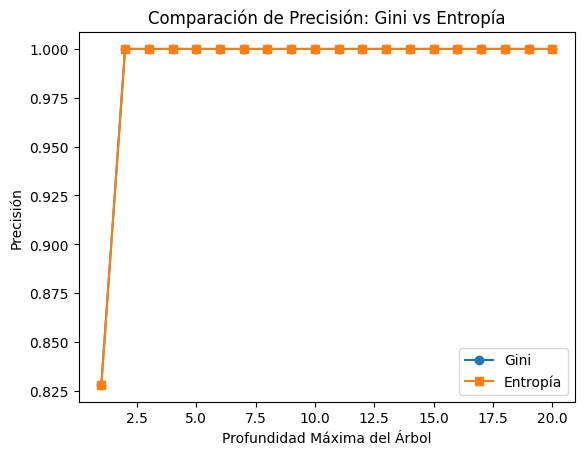

In [7]:
accuracy_scores_entropy = []

for depth in depths:
    model = DecisionTreeClassifier(criterion='entropy', max_depth=depth, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy_scores_entropy.append(accuracy_score(y_test, y_pred))

# Graficar comparación entre Gini y Entropía
plt.plot(depths, accuracy_scores, marker='o', label='Gini')
plt.plot(depths, accuracy_scores_entropy, marker='s', label='Entropía')
plt.xlabel('Profundidad Máxima del Árbol')
plt.ylabel('Precisión')
plt.title('Comparación de Precisión: Gini vs Entropía')
plt.legend()
plt.show()
